# Inductive bias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import sys 
from importlib import reload
sys.path.append("..//Experiment1")
import E1_Functions as func

# Define a discrete color palette with a specified number of colors
#sns.set_palette(sns.color_palette("muted", n_colors=10))  # or use another color map and adjust `n_colors`
custom_palette = ["#FFB347", "#779ECB", "#77DD77", "#FF6961", "#CB99C9", "#FDFD96", "#AEC6CF"]
costum_palette_pairs = ['#ffb347', '#ffcc84', '#ffe6c2', 
                        '#779ecb', '#a4bedc', '#d2dfee', 
                        '#77dd77', '#a4e8a4', '#d2f4d2', 
                        '#ff6961', '#ff9b96', '#ffcdca', 
                        '#cb99c9', '#dcbbdb', '#eedded', 
                        '#fdfd96', '#fefeb9', '#fefedc',
                        '#aec6cf', '#c9d9df', '#e4ecef']

sns.set_palette(custom_palette)
colors = sns.color_palette()
colors_pairs = sns.color_palette(costum_palette_pairs) #("tab20c")

# set title font size
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Enable LaTeX font rendering
#plt.rcParams.update({
#    "text.usetex": True,            # Use LaTeX for all text
#    "font.family": "serif",         # Set the font family to serif (LaTeX default)
#    "font.serif": ["Computer Modern"]  # Use Computer Modern font (LaTeX default font)
#})


In [4]:
save_results = False
save_plots = False

In [197]:
reload(func);

# Example

OLD:
- Dataset consists of 3 num_samples x [x, y] points. 
- The number of training samples i train_points, the number for validation and testing is 100 each. 
- The data is generated from a sine function with some noise. 
- The task is to train a model to predict the sine function.

Questions:
- Should validation and testing be done on the same data? Does not make a difference, since it is generated from the same distribution.
- Should validation and testing be done on the sine function without noise? 

NEW:
- Dataset consists of num_train x [x, y] points for training.
- Validation and testing are identical and is the sine function without noise.

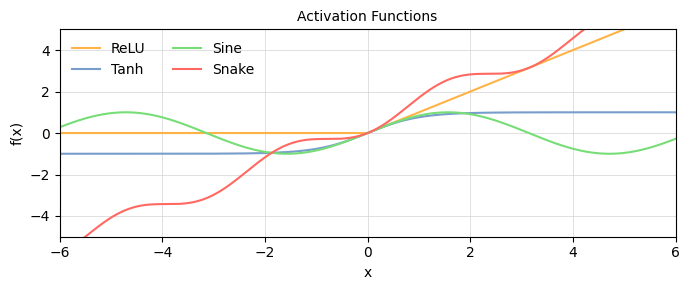

In [198]:
# plot a ReLU and Sine activation function

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
relu = np.maximum(x, 0)
sine = np.sin(x)
tanh = np.tanh(x)
snake = x+np.sin(x)**2

plt.figure(figsize=(7, 3))
plt.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
plt.plot(x, relu, label='ReLU', color=colors[0])
plt.plot(x, tanh, label='Tanh', color=colors[1])
plt.plot(x, sine, label='Sine', color=colors[2])
plt.plot(x, snake, label='Snake', color=colors[3])
plt.title('Activation Functions')
plt.legend(loc='upper left', frameon=False, ncols=2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2*np.pi, 2*np.pi)
plt.xlim(-6, 6)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

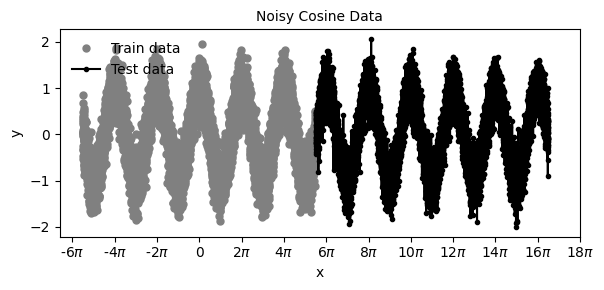

In [212]:
# GENERATE DATA
reload(func);

# Parameters for sine wave dataset
num_points = 10000 #40 #50 #100
noise_std = 0.3

n_waves = 5.5 #5.5

# Generate data
train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=True)

# Plot an example sample
func.plot_data_example(train_x_array, train_y_array, test_x_array, test_y_array)

In [213]:
reload(func);

In [214]:
# TRAIN MODEL
input_size, hidden_sizes, output_size = 1, [64, 64], 1
batch_size = 25
print_every = 300
lr = 0.01

# Define model parameters
#num_points = 10000

# Data
#train_x_array, train_y_array, test_x_array, test_y_array = func.generate_data(num_points, noise_std, n_waves, shifted=True)

# Convert data to tensors and create dataloaders
train_x, train_y, test_x, test_y = func.convert_to_tensor(train_x_array, train_y_array, test_x_array, test_y_array)
train_loader = func.create_dataloader(train_x, train_y, batch_size=batch_size)

# ReLU training

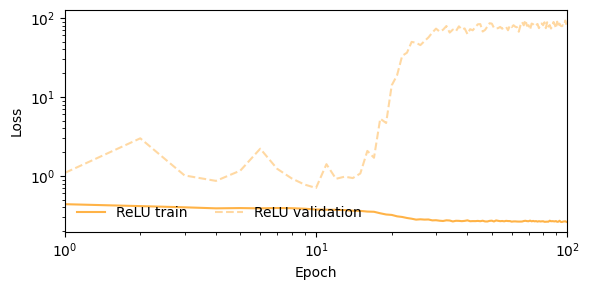

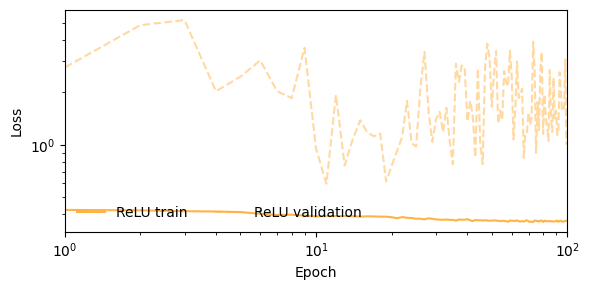

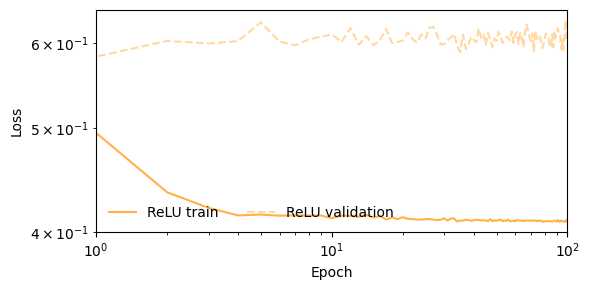

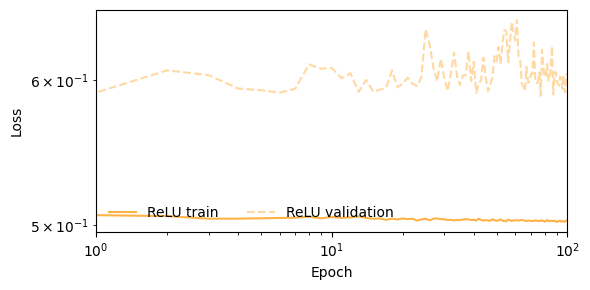

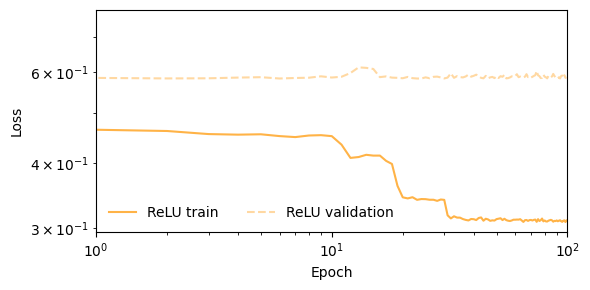

In [215]:
###### ReLUMLP ######
num_epochs = 100

ReLU_train_pred = []
ReLU_test_pred = []

for i in range(5):
    ReLuMLP = func.ReLUMLP(input_size, hidden_sizes, output_size)
    model_ReLUMLP, train_losses_MLP, val_losses_MLP = func.train_model(ReLuMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_ReLUMLP.eval()
    with torch.no_grad():
        train_pred = model_ReLUMLP(train_x).numpy().squeeze()
        test_pred = model_ReLUMLP(test_x).numpy().squeeze()
        ReLU_train_pred.append(train_pred)
        ReLU_test_pred.append(test_pred)

    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.plot(train_losses_MLP, label='ReLU train', color=colors[0])
    ax.plot(val_losses_MLP, label='ReLU validation', ls = '--', color=colors[0], alpha=0.5)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower left', frameon=False, ncols=4)
    ax.set_xlim(1, num_epochs)
    #ax.set_ylim(1e-3, 1e2)
    plt.tight_layout()


# Tanh training

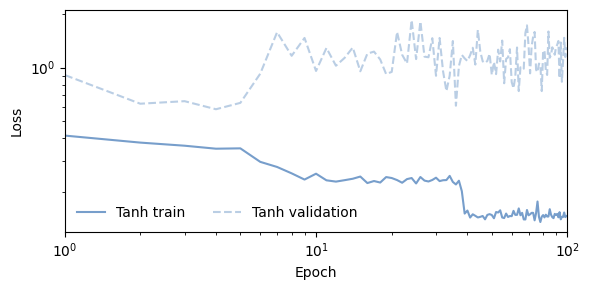

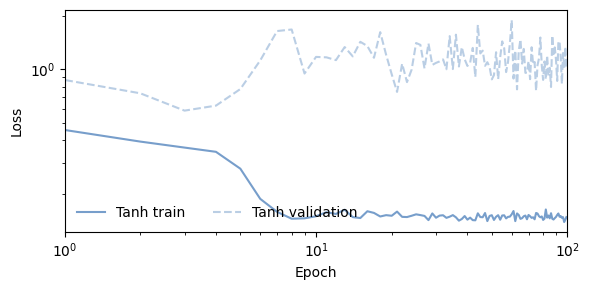

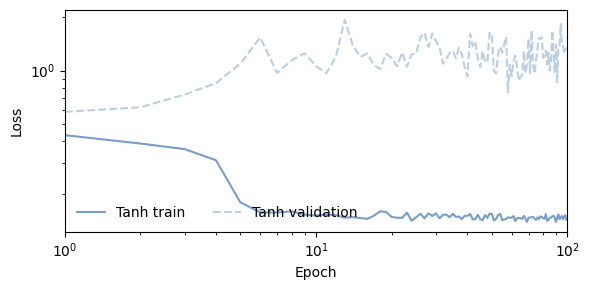

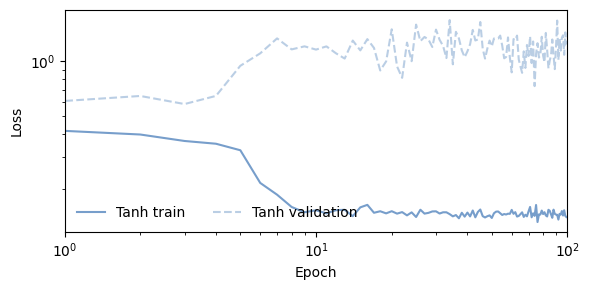

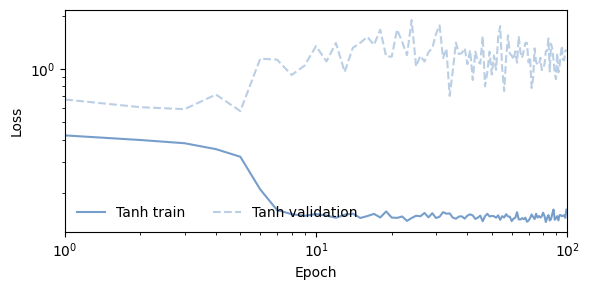

In [216]:
###### TanhMLP ######
num_epochs = 100

Tanh_train_pred = []
Tanh_test_pred = []

for i in range(5):
    TanhMLP = func.TanhMLP(input_size, hidden_sizes, output_size)
    model_TanhMLP, train_losses_TanhMLP, val_losses_TanhMLP = func.train_model(TanhMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_TanhMLP.eval()
    with torch.no_grad():
        train_pred = model_TanhMLP(train_x).numpy().squeeze()
        test_pred = model_TanhMLP(test_x).numpy().squeeze()
        Tanh_train_pred.append(train_pred)
        Tanh_test_pred.append(test_pred)
        
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.plot(train_losses_TanhMLP, label='Tanh train', color=colors[1])
    ax.plot(val_losses_TanhMLP, label='Tanh validation', ls = '--', color=colors[1], alpha=0.5)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower left', frameon=False, ncols=4)
    ax.set_xlim(1, num_epochs)
    #ax.set_ylim(1e-3, 1e2)
    plt.tight_layout()

# Sine training

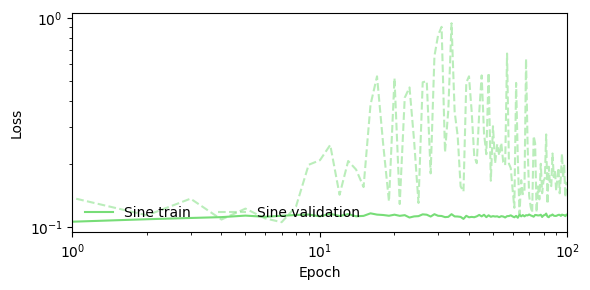

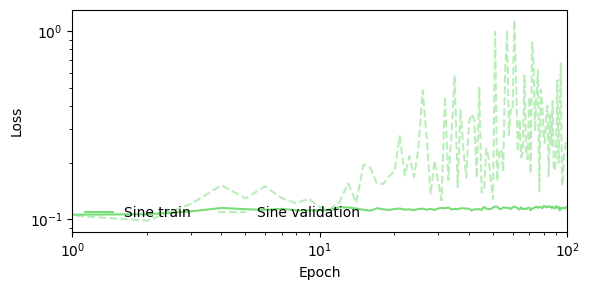

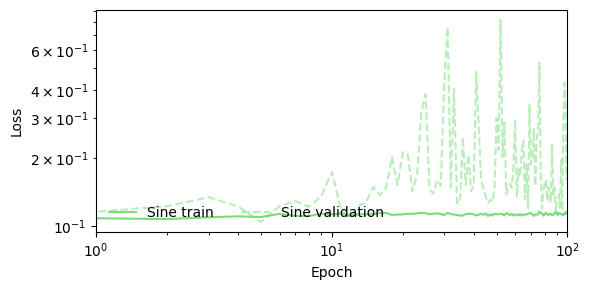

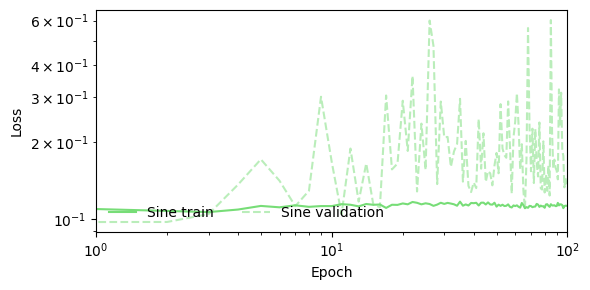

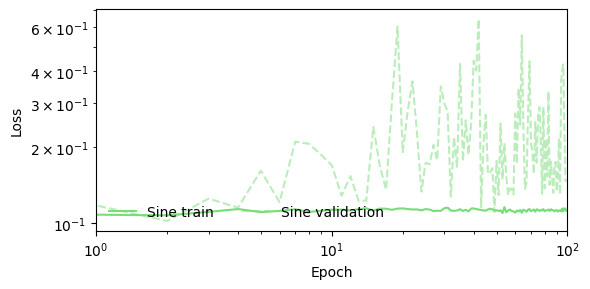

In [217]:
###### SineMLP ######
num_epochs = 100

Sine_train_pred = []
Sine_test_pred = []

for i in range(5):
    SineMLP = func.SineMLP(input_size, hidden_sizes, output_size)
    model_SineMLP, train_losses_SineMLP, val_losses_SineMLP = func.train_model(SineMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_SineMLP.eval()
    with torch.no_grad():
        train_pred = model_SineMLP(train_x).numpy().squeeze()
        test_pred = model_SineMLP(test_x).numpy().squeeze()
        Sine_train_pred.append(train_pred)
        Sine_test_pred.append(test_pred)

    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.plot(train_losses_SineMLP, label='Sine train', color=colors[2])
    ax.plot(val_losses_SineMLP, label='Sine validation', ls = '--', color=colors[2], alpha=0.5)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower left', frameon=False, ncols=4)
    ax.set_xlim(1, num_epochs)
    #ax.set_ylim(1e-3, 1e2)
    plt.tight_layout()

# Snake training

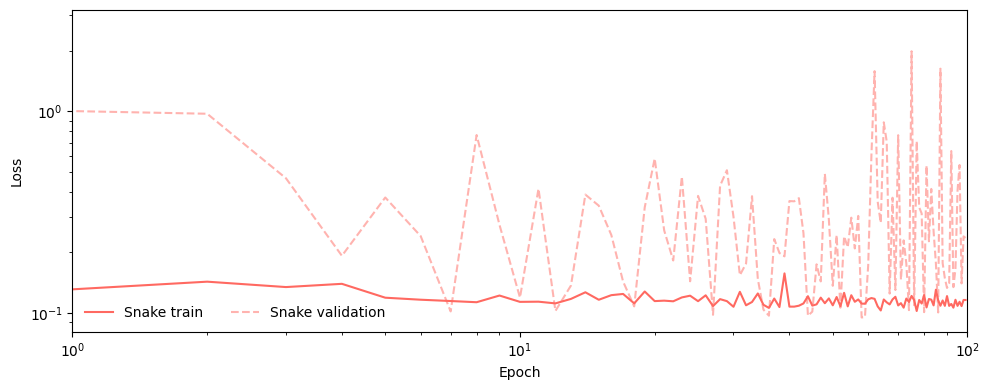

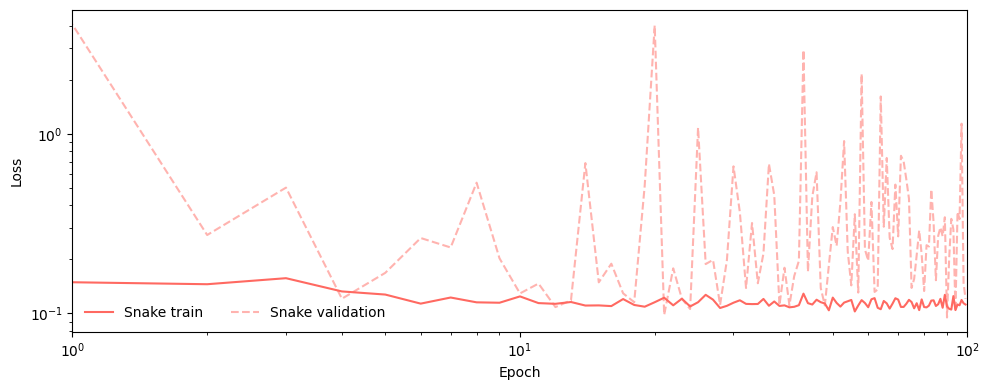

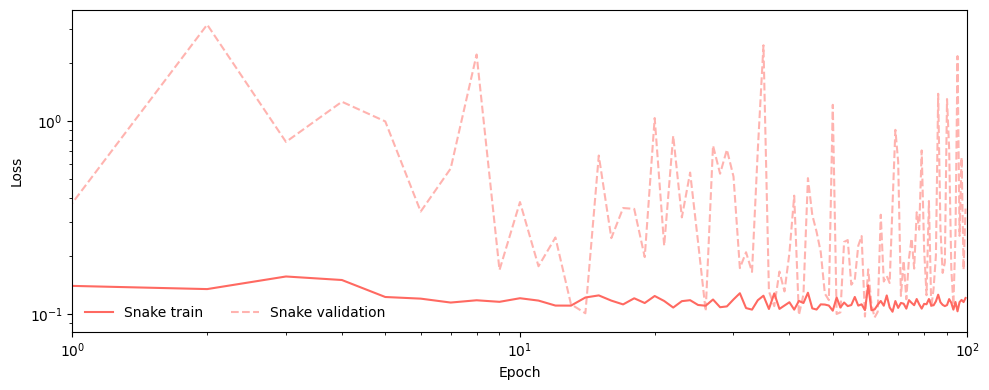

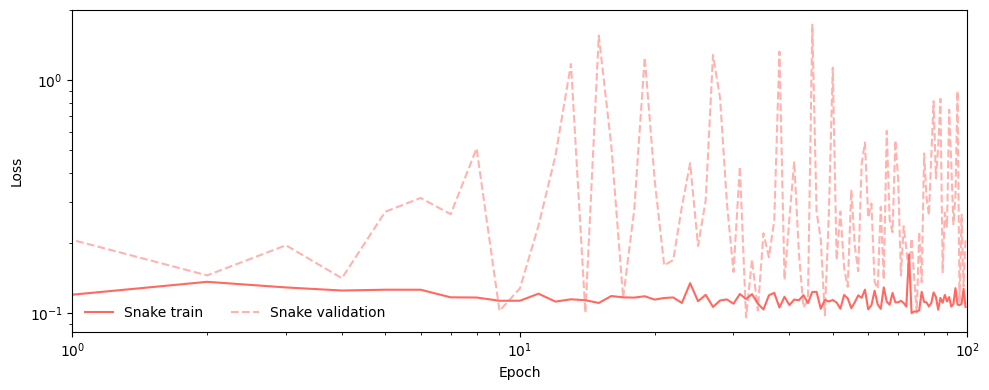

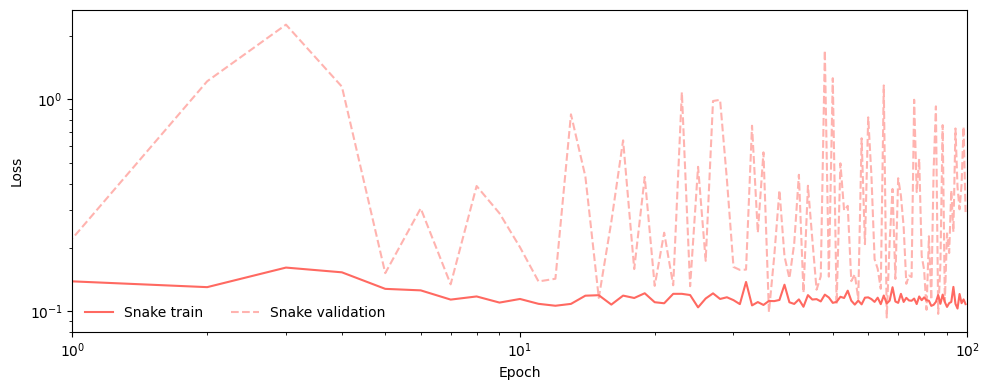

In [218]:
###### SnakeMLP ######
num_epochs = 100

snake_train_pred = []
snake_test_pred = []

for i in range(5):
    SnakeMLP = func.SnakeMLP(input_size, hidden_sizes, output_size)
    model_SnakeMLP, train_losses_SnakeMLP, val_losses_SnakeMLP = func.train_model(SnakeMLP, train_loader, test_x, test_y, lr, num_epochs=num_epochs, print_every=print_every)

    model_SnakeMLP.eval()
    with torch.no_grad():
        train_pred = model_SnakeMLP(train_x).numpy().squeeze()
        test_pred = model_SnakeMLP(test_x).numpy().squeeze()
        snake_train_pred.append(train_pred)
        snake_test_pred.append(test_pred)

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.plot(train_losses_SnakeMLP, label='Snake train', color=colors[3])
    ax.plot(val_losses_SnakeMLP, label='Snake validation', ls = '--', color=colors[3], alpha=0.5)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower left', frameon=False, ncols=4)
    ax.set_xlim(1, num_epochs)
    #ax.set_ylim(1e-3, 1e2)
    plt.tight_layout()

In [219]:
mean = pd.DataFrame(columns=['ReLU', 'Tanh', 'Sine', 'Snake'], index=['Train', 'Test'])
std = pd.DataFrame(columns=['ReLU', 'Tanh', 'Sine', 'Snake'], index=['Train', 'Test'])

mean.loc['Train', 'ReLU'] = np.mean(ReLU_train_pred, axis=0)
mean.loc['Test', 'ReLU'] = np.mean(ReLU_test_pred, axis=0)

mean.loc['Train', 'Tanh'] = np.mean(Tanh_train_pred, axis=0)
mean.loc['Test', 'Tanh'] = np.mean(Tanh_test_pred, axis=0)

mean.loc['Train', 'Sine'] = np.mean(Sine_train_pred, axis=0)
mean.loc['Test', 'Sine'] = np.mean(Sine_test_pred, axis=0)

mean.loc['Train', 'Snake'] = np.mean(snake_train_pred, axis=0)
mean.loc['Test', 'Snake'] = np.mean(snake_test_pred, axis=0)

std.loc['Train', 'ReLU'] = np.std(ReLU_train_pred, axis=0)
std.loc['Test', 'ReLU'] = np.std(ReLU_test_pred, axis=0)

std.loc['Train', 'Tanh'] = np.std(Tanh_train_pred, axis=0)
std.loc['Test', 'Tanh'] = np.std(Tanh_test_pred, axis=0)

std.loc['Train', 'Sine'] = np.std(Sine_train_pred, axis=0)
std.loc['Test', 'Sine'] = np.std(Sine_test_pred, axis=0)

std.loc['Train', 'Snake'] = np.std(snake_train_pred, axis=0)
std.loc['Test', 'Snake'] = np.std(snake_test_pred, axis=0)

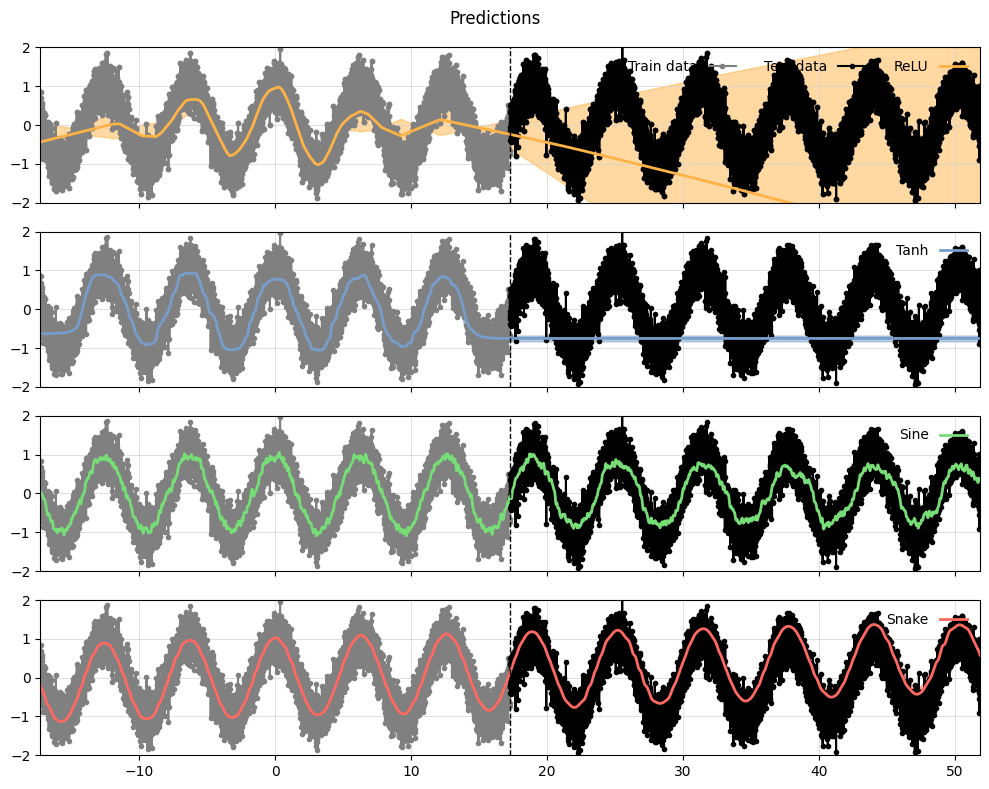

In [220]:




# PLOT RESULTS
# Create a figure and specify GridSpec
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True) #, gridspec_kw={'height_ratios': [2, 1]})

axes[0].plot(train_x_array, train_y_array, label='Train data', color='grey', marker='o', ms=3, ls='-')
axes[0].plot(test_x_array, test_y_array, label='Test data', color='black', marker='o', ms=3, ls='-')

for ax in axes:
    ax.grid(True, color='lightgrey', linestyle='-', linewidth=0.5)
    ax.plot(train_x_array, train_y_array, color='grey', marker='o', ms=3, ls='-')
    ax.plot(test_x_array, test_y_array, color='black', marker='o', ms=3, ls='-')

lw = 2
alpha = 0.5

axes[0].plot(train_x_array, mean.loc['Train', 'ReLU'], label='ReLU', color=colors[0], lw=lw)
axes[0].fill_between(train_x_array, mean.loc['Train', 'ReLU'] - std.loc['Train', 'ReLU'], mean.loc['Train', 'ReLU'] + std.loc['Train', 'ReLU'], color=colors[0], alpha=alpha) 
axes[0].plot(test_x_array, mean.loc['Test', 'ReLU'], color=colors[0], ls='-', lw=lw)
axes[0].fill_between(test_x_array, mean.loc['Test', 'ReLU'] - std.loc['Test', 'ReLU'], mean.loc['Test', 'ReLU'] + std.loc['Test', 'ReLU'], color=colors[0], alpha=alpha)

axes[1].plot(train_x_array, mean.loc['Train', 'Tanh'], label='Tanh', color=colors[1], lw=lw)
axes[1].fill_between(train_x_array, mean.loc['Train', 'Tanh'] - std.loc['Train', 'Tanh'], mean.loc['Train', 'Tanh'] + std.loc['Train', 'Tanh'], color=colors[1], alpha=alpha)
axes[1].plot(test_x_array, mean.loc['Test', 'Tanh'], color=colors[1], ls='-', lw=lw)
axes[1].fill_between(test_x_array, mean.loc['Test', 'Tanh'] - std.loc['Test', 'Tanh'], mean.loc['Test', 'Tanh'] + std.loc['Test', 'Tanh'], color=colors[1], alpha=alpha)

axes[2].plot(train_x_array, mean.loc['Train', 'Sine'], label='Sine', color=colors[2], lw=lw)
axes[2].fill_between(train_x_array, mean.loc['Train', 'Sine'] - std.loc['Train', 'Sine'], mean.loc['Train', 'Sine'] + std.loc['Train', 'Sine'], color=colors[2], alpha=alpha)
axes[2].plot(test_x_array, mean.loc['Test', 'Sine'], color=colors[2], ls='-', lw=lw)
axes[2].fill_between(test_x_array, mean.loc['Test', 'Sine'] - std.loc['Test', 'Sine'], mean.loc['Test', 'Sine'] + std.loc['Test', 'Sine'], color=colors[2], alpha=alpha)

axes[3].plot(train_x_array, mean.loc['Train', 'Snake'], label='Snake', color=colors[3], lw=lw)
axes[3].fill_between(train_x_array, mean.loc['Train', 'Snake'] - std.loc['Train', 'Snake'], mean.loc['Train', 'Snake'] + std.loc['Train', 'Snake'], color=colors[3], alpha=alpha)
axes[3].plot(test_x_array, mean.loc['Test', 'Snake'], color=colors[3], ls='-', lw=lw)
axes[3].fill_between(test_x_array, mean.loc['Test', 'Snake'] - std.loc['Test', 'Snake'], mean.loc['Test', 'Snake'] + std.loc['Test', 'Snake'], color=colors[3], alpha=alpha)

for ax in axes:
    ax.vlines(5.5*np.pi, -2, 2, color='black', ls='--', lw=1)
    ax.set_xlim(-5.5*np.pi, 16.5*np.pi)
    ax.set_ylim(-2, 2.)
    ax.legend(loc='upper right', frameon=False, ncol=3, markerfirst=False)  

# title for all plots
#fig.suptitle('Predictions')

plt.tight_layout()
plt.show()
